<a href="https://colab.research.google.com/github/asheta66/Generative-AI-2/blob/main/1_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Necessary Libraries**

In [37]:
# # Install latex
# !sudo apt-get update -y
# !sudo apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**2. Load and Display Images**

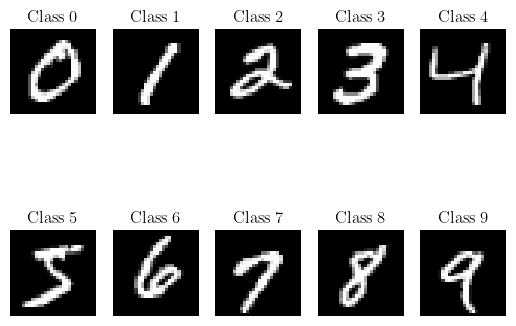

<Figure size 640x480 with 0 Axes>

In [39]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display one image from each class
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[y_train == i][0], cmap='gray')
    plt.title(f'Class {i}')
    plt.axis('off')
plt.show()

plt.savefig('sample_images.png')



**3. Identify Image Size**

In [40]:
# Identify the image size
image_shape = x_train.shape[1:]
print(f"Image size: {image_shape}")

Image size: (28, 28)


**4. Split Data**

In [41]:
# Normalize the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape data to include channel dimension
x_train = np.reshape(x_train, (len(x_train), np.prod(image_shape)))
x_test = np.reshape(x_test, (len(x_test), np.prod(image_shape)))

# Split data into training and testing (80%-20%)
split_index = int(0.8 * len(x_train))
x_train_split, x_val_split = x_train[:split_index], x_train[split_index:]
y_train_split, y_val_split = y_train[:split_index], y_train[split_index:]

**5. Define and Display Autoencoder Structure**

In [42]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

input_img = Input(shape=(np.prod(image_shape),))

# Encoder
encoded = Dense(256, activation='relu')(input_img)
encoded = Dropout(0.3)(encoded)  # Dropout for regularization
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(np.prod(image_shape), activation='sigmoid')(decoded)

# Combine encoder and decoder into an autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the structure of the model
autoencoder.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 784)                 │         201,488 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 489,136 (1.87 MB)

 Trainable params: 489,136 (1.87 MB)

 Non-trainable params: 0 (0.00 B)

**6. Train the Autoencoder**

In [44]:
# Train the autoencoder
history = autoencoder.fit(x_train_split, x_train_split,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_val_split, x_val_split))

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - accuracy: 0.0067 - loss: 0.3459 - val_accuracy: 0.0122 - val_loss: 0.1849
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.0101 - loss: 0.1752 - val_accuracy: 0.0077 - val_loss: 0.1487
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.0097 - loss: 0.1501 - val_accuracy: 0.0080 - val_loss: 0.1370
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.0090 - loss: 0.1406 - val_accuracy: 0.0088 - val_loss: 0.1288
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.0106 - loss: 0.1340 - val_accuracy: 0.0097 - val_loss: 0.1236
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.0118 - loss: 0.1289 - val_accuracy: 0.0129 - val_loss: 0.1188
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.0113 - loss: 0.1254 - val_accuracy: 0.0093 - val_loss: 0.1160
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.0123 - loss: 0.1231 - val_acc

**7. Display Loss and Accuracy**

In [45]:
import matplotlib.pyplot as plt

# Enable LaTeX rendering for titles and labels
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

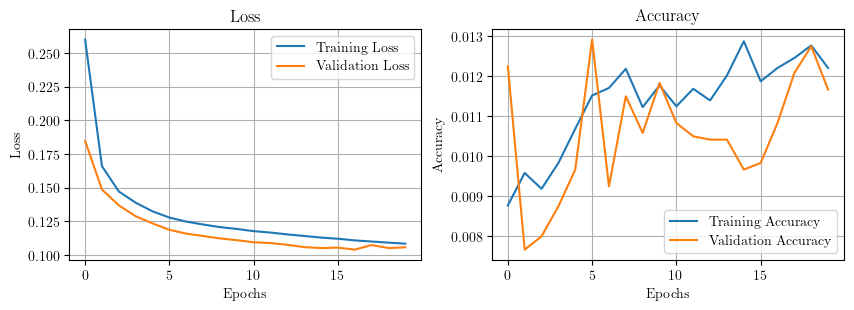

<Figure size 640x480 with 0 Axes>

In [51]:
# Plot loss and accuracy for training and validation
plt.figure(figsize=(10, 3))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()
plt.savefig('loss_accuracy.png')

**8. Evaluate Performance (Accuracy, Precision, Recall, F1 Score)**

In [47]:
# Predictions
train_pred = autoencoder.predict(x_train_split)
test_pred = autoencoder.predict(x_val_split)

# Flatten predictions
train_pred_flat = np.round(train_pred.flatten())
test_pred_flat = np.round(test_pred.flatten())

# Flatten true values
y_train_flat = np.round(x_train_split.flatten())
y_val_flat = np.round(x_val_split.flatten())

# Calculate metrics for training and testing data
train_accuracy = accuracy_score(y_train_flat, train_pred_flat)
train_precision = precision_score(y_train_flat, train_pred_flat)
train_recall = recall_score(y_train_flat, train_pred_flat)
train_f1 = f1_score(y_train_flat, train_pred_flat)

test_accuracy = accuracy_score(y_val_flat, test_pred_flat)
test_precision = precision_score(y_val_flat, test_pred_flat)
test_recall = recall_score(y_val_flat, test_pred_flat)
test_f1 = f1_score(y_val_flat, test_pred_flat)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [49]:
# !pip install prettytable

In [52]:
import pandas as pd
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()
table.field_names = ["Metric", "Training", "Testing"]

# Add rows to the table
table.add_row(["Accuracy", f"{train_accuracy:3.5f}", f"{test_accuracy:3.5f}"])
table.add_row(["Precision", f"{train_precision:3.5f}", f"{test_precision:3.5f}"])
table.add_row(["Recall", f"{train_recall:3.5f}", f"{test_recall:3.5f}"])
table.add_row(["F1 Score", f"{train_f1:3.5f}", f"{test_f1:3.5f}"])

# Convert PrettyTable to DataFrame
table_data = table.get_string().split('\n')
headers = table_data[1].split('|')[1:-1]
rows = [row.split('|')[1:-1] for row in table_data[3:-1]]

df = pd.DataFrame(rows, columns=headers)
df.T

,0,1,2,3
Metric,Accuracy,Precision,Recall,F1 Score
Training,0.96232,0.91357,0.79028,0.84747
Testing,0.96182,0.91058,0.78674,0.84414


**9. Display Original and Reconstructed Images**

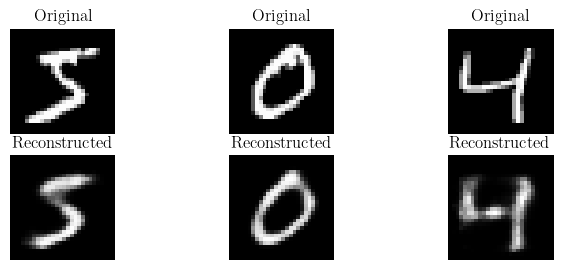

<Figure size 640x480 with 0 Axes>

In [50]:
# Show 3 examples from training data before and after reconstruction
n = 3
plt.figure(figsize=(8, 3))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_split[i].reshape(image_shape), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(train_pred[i].reshape(image_shape), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

plt.savefig('original_reconstructed.png')

